<a href="https://www.kaggle.com/code/victorgonzlezgmez/gg-hc-proyecto-final?scriptVersionId=112957019" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Proyecto final - Unidad 5 - Big data para redes sociales.

*Elaborado por:
González Gómez Víctor Emmanuel y
Hernández Campos José Pablo.*

**Este proyecto consiste en elaborar un sistema en Python que automatice el análisis de sentimientos acerca de las reseñas de una reposteria, con la finalidad de presentar al dueño las áreas de oportunidad de su servicios y productos, así como las fortalezas que tiene.**

**El proceso se realiza al recibir a través de la metodología de recopilación de datos, la cual consiste en una preguntas breves acerca de la opinión del consumidor, utilizando la plataforma digital Google Forms.**

**Google Forms permite generar un archivo CSV el cual modificaremos para dar formato de acuerdo a las necesidades del proyecto.**

**Las preguntas realizadas a los clientes fueron las siguientes:**
* Genero
* Edad
* Opinión

**A si mismo Google Forms genera dos gráficas muy simples que ayudan a comprender la muestra seleccionada**

**En esta gráfica de PIE podemos observar el genero en porcentaje de las personas**

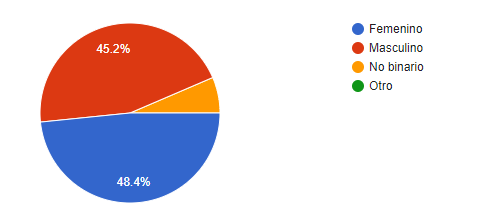


**En esta gráfica de barras podemos observar la edad de las personas que realizaron una breve reseña**

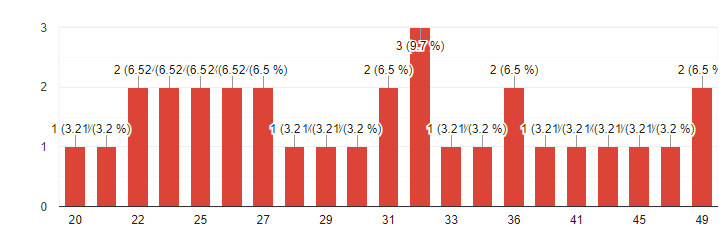

**En cuanto a la colaboración utilizamos como vía GitHub para poder enviar y recibir commits del proceso del proyecto, ya que Kaggle no cuenta al cien porciento con la capacidad de trabajar de manera colaborativa, sin embargo tiene la integración con la plataforma GitHub. Este es el enlace hacía el proyecto: https://github.com/VictorGlzg/GG-HC_PROYECTO_FINAL**

# 1.- Lectura de datos (.csv).

In [1]:
import pandas as pd

# leer el csv con las reseñas
reviews_df = pd.read_csv("/kaggle/input/jelidesserts/Reseas Pasteleria Jeli Desserts.csv")

reviews_df.head()

,Marca temporal,Genero,Edad,Opinión
0,2022/12/04 6:48:54 p. m. GMT-6,Masculino,31,"Tiene unos exquisitos postres hay variedad, sú..."
1,2022/12/04 6:49:13 p. m. GMT-6,Femenino,28,"Postres muy ricos, sobre todo los pasteles con..."
2,2022/12/04 6:49:41 p. m. GMT-6,Femenino,44,"buen sabor; Para después de la comida, o de me..."
3,2022/12/04 6:49:42 p. m. GMT-6,Femenino,24,Las empanadas estaban muy ricas pero la de piñ...
4,2022/12/04 6:49:59 p. m. GMT-6,Femenino,30,Sin duda de las mejores pasteles de chocolate ...


# 2.- Preparación del dataframe

In [2]:
#dar formato a la fecha
fecha = reviews_df["Marca temporal"].str.split() # selecciona únicamente la fecha del formato de marca temporal
for i in range(len(reviews_df)):
    #agregar a la nueva columna
    reviews_df["Fecha"] = fecha[i][0]

# borrar columna sobrante
reviews_df = reviews_df.drop(labels="Marca temporal", axis=1)

reviews_df.head()

,Genero,Edad,Opinión,Fecha
0,Masculino,31,"Tiene unos exquisitos postres hay variedad, sú...",2022/12/04
1,Femenino,28,"Postres muy ricos, sobre todo los pasteles con...",2022/12/04
2,Femenino,44,"buen sabor; Para después de la comida, o de me...",2022/12/04
3,Femenino,24,Las empanadas estaban muy ricas pero la de piñ...,2022/12/04
4,Femenino,30,Sin duda de las mejores pasteles de chocolate ...,2022/12/04


# 3.- Análisis de sentimientos

In [3]:
#Cargar las librerías para el NLTK que se utiliza para el analisis de sentimientos
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia= SentimentIntensityAnalyzer()

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
#Utilizamos la variable sia que se encarga de separar el sentimiento de la oración en negativo, neutral y positivo.
reviews_df['puntuacion'] = reviews_df['Opinión'].apply(lambda text:sia.polarity_scores(str(text)))
reviews_df.head()

,Genero,Edad,Opinión,Fecha,puntuacion
0,Masculino,31,"Tiene unos exquisitos postres hay variedad, sú...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Femenino,28,"Postres muy ricos, sobre todo los pasteles con...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Femenino,44,"buen sabor; Para después de la comida, o de me...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Femenino,24,Las empanadas estaban muy ricas pero la de piñ...,2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Femenino,30,Sin duda de las mejores pasteles de chocolate ...,2022/12/04,"{'neg': 0.14, 'neu': 0.582, 'pos': 0.279, 'com..."


In [5]:
#Obtenemos el puntaje de la evaluación
reviews_df['compound']= reviews_df['puntuacion'].apply(lambda score_dict:score_dict['compound'])
reviews_df.head()

,Genero,Edad,Opinión,Fecha,puntuacion,compound
0,Masculino,31,"Tiene unos exquisitos postres hay variedad, sú...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,Femenino,28,"Postres muy ricos, sobre todo los pasteles con...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,Femenino,44,"buen sabor; Para después de la comida, o de me...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Femenino,24,Las empanadas estaban muy ricas pero la de piñ...,2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Femenino,30,Sin duda de las mejores pasteles de chocolate ...,2022/12/04,"{'neg': 0.14, 'neu': 0.582, 'pos': 0.279, 'com...",0.5562


In [6]:
#Este método clasifica si es positivo o negativo el puntaje.
def val(sent):
    if sent>=0:
        return "positivo"
    else:
        return "negativo"
    
reviews_df['comp_score']= reviews_df['compound'].apply(lambda c: val(c))

reviews_df.head()

,Genero,Edad,Opinión,Fecha,puntuacion,compound,comp_score
0,Masculino,31,"Tiene unos exquisitos postres hay variedad, sú...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positivo
1,Femenino,28,"Postres muy ricos, sobre todo los pasteles con...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positivo
2,Femenino,44,"buen sabor; Para después de la comida, o de me...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positivo
3,Femenino,24,Las empanadas estaban muy ricas pero la de piñ...,2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positivo
4,Femenino,30,Sin duda de las mejores pasteles de chocolate ...,2022/12/04,"{'neg': 0.14, 'neu': 0.582, 'pos': 0.279, 'com...",0.5562,positivo


# 4.- Gráfica de dona.

In [7]:
#Aqui realizamos un conteo de la cantidad total de reseñas, así como la cantidad de positivas y negativas.
total = reviews_df['comp_score'].count()

aux = reviews_df[reviews_df["comp_score"] == "negativo"]
negativas = aux['comp_score'].count()

aux = reviews_df[reviews_df["comp_score"] == "positivo"]
positivos = aux['comp_score'].count()

print("Total de reseñas %s,\t Total de reseñas positivas %s, \t Total de reseñas negativas %s"%(str(total),str(positivos),str(negativas)))

Total de reseñas 31,	 Total de reseñas positivas 27, 	 Total de reseñas negativas 4


In [8]:
import numpy as np
#Calculamos los porcentajes de positivos y negativos.

porcentP = positivos/total
porcentP = np.round(porcentP,2)

porcentN = negativas/total
porcentN = np.round(porcentN,2)

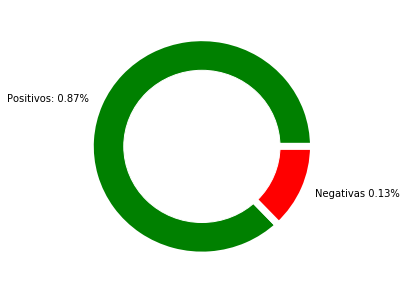

In [9]:
# Parametros para dar diseño a la gráfica dona
d = ['Positivos: '+str(porcentP)+'%','Negativas '+str(porcentN)+'%']
data = [positivos,negativas]
colors = ("green", "red")

# Circulo para generar la figura de dona
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Formato para separar los grupos
plt.figure(figsize =(5, 5))
plt.pie(data, labels=d, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, colors = colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**En esta gráfica de dona se puede representar el porcentaje de opiniones positivas y negativas del total, como se puede ver, en su mayoria son positivas de la muestra que obtuvimos sin embargo, existe a su vez una cantidad de personas inconformes con el servicio las cuales tambien son útiles de analizar, principalmente reconocer la problemática en promedio**

In [10]:
#Agregamos las stopwords
stoplist = sorted(stopwords.words('spanish'))

print(" ".join(stoplist))

a al algo algunas algunos ante antes como con contra cual cuando de del desde donde durante e el ella ellas ellos en entre era erais eran eras eres es esa esas ese eso esos esta estaba estabais estaban estabas estad estada estadas estado estados estamos estando estar estaremos estará estarán estarás estaré estaréis estaría estaríais estaríamos estarían estarías estas este estemos esto estos estoy estuve estuviera estuvierais estuvieran estuvieras estuvieron estuviese estuvieseis estuviesen estuvieses estuvimos estuviste estuvisteis estuviéramos estuviésemos estuvo está estábamos estáis están estás esté estéis estén estés fue fuera fuerais fueran fueras fueron fuese fueseis fuesen fueses fui fuimos fuiste fuisteis fuéramos fuésemos ha habida habidas habido habidos habiendo habremos habrá habrán habrás habré habréis habría habríais habríamos habrían habrías habéis había habíais habíamos habían habías han has hasta hay haya hayamos hayan hayas hayáis he hemos hube hubiera hubierais hubier

# 5.- Separar las reseñas por grupos (positivas/negativas)

In [11]:
#Separar las reviews por positivas y negativas
reviewsPositivas = reviews_df[reviews_df["comp_score"]=="positivo"]
reviewsNegativas = reviews_df[reviews_df["comp_score"]=="negativo"]

In [12]:
reviewsPositivas.head()

,Genero,Edad,Opinión,Fecha,puntuacion,compound,comp_score
0,Masculino,31,"Tiene unos exquisitos postres hay variedad, sú...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positivo
1,Femenino,28,"Postres muy ricos, sobre todo los pasteles con...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positivo
2,Femenino,44,"buen sabor; Para después de la comida, o de me...",2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positivo
3,Femenino,24,Las empanadas estaban muy ricas pero la de piñ...,2022/12/04,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positivo
4,Femenino,30,Sin duda de las mejores pasteles de chocolate ...,2022/12/04,"{'neg': 0.14, 'neu': 0.582, 'pos': 0.279, 'com...",0.5562,positivo


In [13]:
reviewsNegativas

,Genero,Edad,Opinión,Fecha,puntuacion,compound,comp_score
7,Masculino,36,Los sabores exquisitos y la atención inmejorab...,2022/12/04,"{'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'comp...",-0.5574,negativo
24,Femenino,32,El pastel no tenia sabor y la crema sabia muy fea,2022/12/04,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...",-0.2960,negativo
28,Femenino,20,No fueron de mi agrado,2022/12/04,"{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'comp...",-0.2960,negativo
29,Masculino,22,"Ni buenos ni malos, no sobresalen",2022/12/04,"{'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'comp...",-0.2960,negativo


# 6.- Obtener las palabras para nubes de palabras

In [14]:
#Unificar palabras de cada sección.

palabrasPOSITIVAS = " ".join(i for i in reviewsPositivas.Opinión)

palabrasNEGATIVAS = " ".join(i for i in reviewsNegativas.Opinión)

# 7.- Nubes de palabras positivas

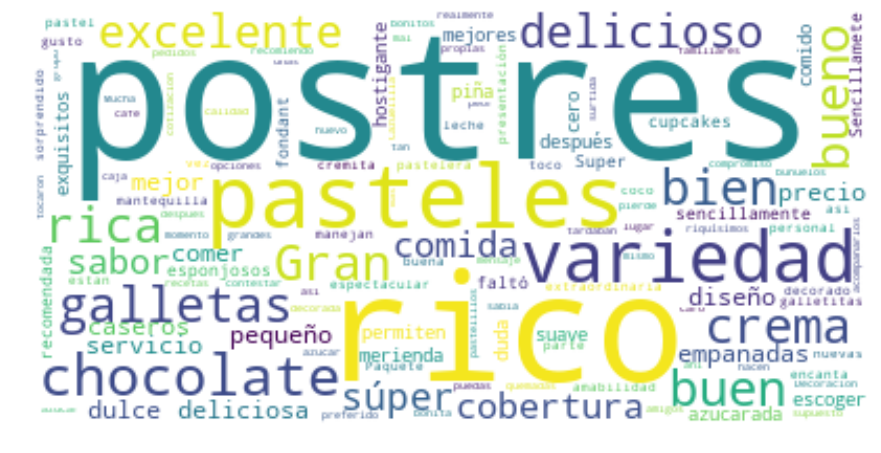

In [15]:
# Nube de Palabras
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stoplist, background_color="white").generate(palabrasPOSITIVAS)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

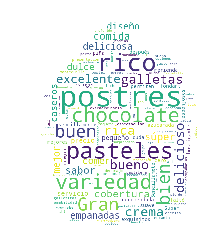

In [16]:
#Nube de palabras con forma de cupcake
import PIL
from PIL import Image

python_mask = np.array(PIL.Image.open("/kaggle/input/imagecup/logocup.jpg"))
wcp = WordCloud(stopwords = stoplist, mask = python_mask,
               background_color= "white").generate(palabrasPOSITIVAS)
plt.imshow(wcp)
plt.axis("off")
plt.show()

**En esta muestra realizamos una wordcloud como ya se conoce, pero en esta solo se presentan las palabras positivas en las reseñas de los clientes.** 

**La wordcloud se muestra de 2 distintas formas; la normal mostrando el recuadro con totas las palabras y la segunda en donde aplicamos una máscara a la nube, adoptando la silueta de un cupcake haciendo referencia a lo que va el negocio. Cabe destacar que para la segunda forma de la wordcloud con la máscara pusimos un medidor para el numero de palabras mostradas, esto debido al tamaño de la imagen.**

# 8.- Nubes de palabras negativas

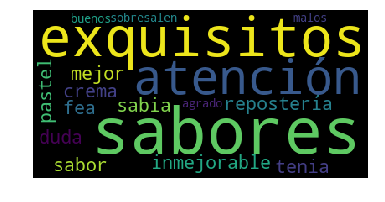

In [17]:
wcp = WordCloud(stopwords = stoplist, max_words = 20).generate(palabrasNEGATIVAS)
plt.imshow(wcp)
plt.axis("off")
plt.show()

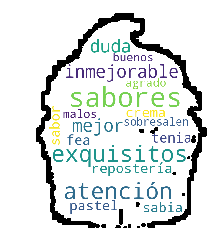

In [18]:
python_mask = np.array(PIL.Image.open("/kaggle/input/imagecup/logocup.jpg"))
wcp = WordCloud(stopwords = stoplist, mask = python_mask,
               background_color= "white",
                contour_color = "black",
               contour_width= 25,
               min_font_size=3,
               max_words = 20).generate(palabrasNEGATIVAS)
plt.imshow(wcp)
plt.axis("off")
plt.show()

**Siendo la anterior la wordcloud de las palabras positivas ahora se presentan las palabras negativas mostradas. Analizando esta wordcloud y de acuerdo a los datos arrojados del análisis podemos ver que además de ser muy pocas las reviews negativas en la wordcloud se muestra una palabra que a nuestro parecer no entraría en la categoría, siendo la palabra "exquisitos", siendo tal vez esto una deficiencia del analizador.**

# 9.- Histograma reseñas por rango de edades.
**Rango de edades:**
* Menor 18 años.
* 18 - 25 años.
* 26 - 33 años.
* 34 - 41 años.
* 42 - 49 años.
* 50 - 57 años.
* 58 - 65 años.
* 66 - 73 años.
* 74 - 81 años.
* Mas de 81 años.

In [19]:
#Realizamos el conteo por rangos.

conteoEdades = []

Rango_m18 = reviews_df[reviews_df["Edad"]<18]
conteoEdades.append(Rango_m18["Opinión"].count()) 

#Establecemos los parametros que irán aumentando de los rangos
limIn = 18
limSup = 26

for i in range(8):
    aux = reviews_df[reviews_df["Edad"]>=limIn]
    aux = aux[aux["Edad"]<limSup]
    conteoEdades.append(aux["Opinión"].count()) 
    limIn = limSup
    limSup += 8

RangoM80 = reviews_df[reviews_df["Edad"]>=81]
conteoEdades.append(RangoM80["Opinión"].count())

In [20]:
conteoEdades

[0, 8, 13, 5, 5, 0, 0, 0, 0, 0]

In [21]:
edades = []
aux = reviews_df["Edad"]
cantidad = len(aux)
for i in range(cantidad):
    edades.append(aux[i])

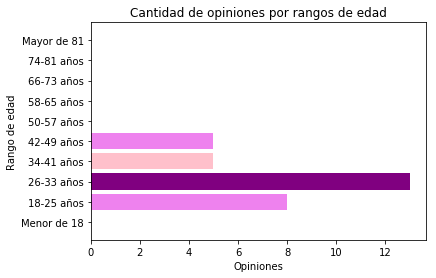

In [22]:
#Crear el histograma con los rango de edades y el conteo por rango
titulo = ["Menor de 18", "18-25 años", "26-33 años", "34-41 años", "42-49 años", "50-57 años", "58-65 años", "66-73 años","74-81 años", "Mayor de 81"]
rangos = range(1,10)
plt.barh(titulo,conteoEdades, color=("pink","violet","purple"))
plt.xlabel('Opiniones')
plt.ylabel("Rango de edad")
plt.title('Cantidad de opiniones por rangos de edad')
plt.show()

**En esta gráfica podemos observar que la mayor concentración con respecto a la edad de la muestra que obtuvimos es en el rango de edad de 26 a 33 años, es decir, que las personas que se encuentran en ese rango de edad tienen mayor interés en dar una reseña del servicio de la empresa, por lo tanto pueden existir ciertas preferencias hacía algunos productos que sean de interés de este rango de edades.**

# 10.- Gráfica de puntos y hexágonos

**10.1.- Con respecto a la edad y el genero:**

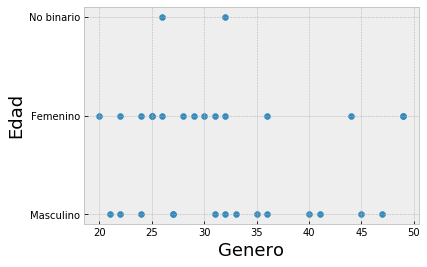

In [23]:
x = reviews_df['Edad']
y = reviews_df['Genero'] 
plt.style.use('bmh')
plt.xlabel('Genero', fontsize = 18)
plt.ylabel('Edad', fontsize = 18)
plt.scatter(x,y)
plt.show()

**Para esta grafica realizamos una gráfica de dispersión la cual sirve para averiguar la intensidad de la relación entre dos variables. Se aplicaron las columnas 'Edad' y 'Genero' en donde podemos ver la intensidad de relación entre ambas. Como nota se aplicó un estilo disitnto a esta, siendo el bmh.**

**10.2.- Con respecto a la edad y el puntaje de análisis de sentimientos:**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


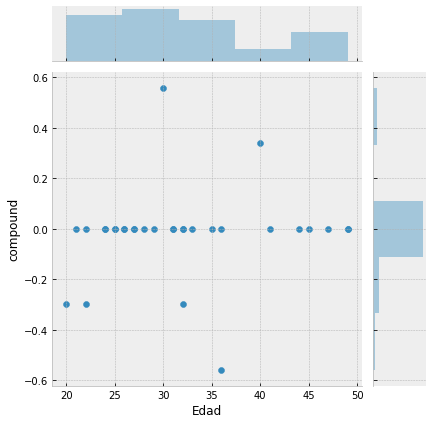

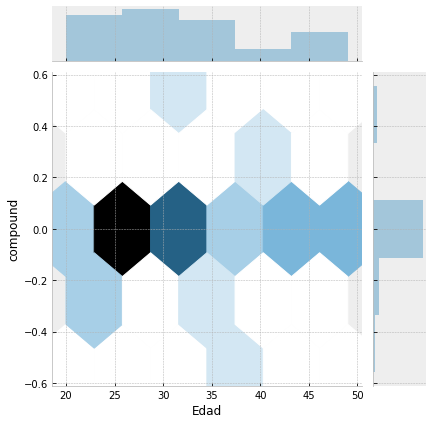

In [24]:
# library & dataset
import seaborn as sns
 
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=reviews_df["Edad"], y=reviews_df["compound"], kind='scatter')
sns.jointplot(x=reviews_df["Edad"], y=reviews_df["compound"], kind='hex')

plt.show()

**Como se puede observar en estas dos gráficas a pesar de que la gráfica de dona del inicio nos refleja que en su mayoría las reseñas fueron positivas, aquí se puede ver que enrealidad la mayoría fué neutra, es interesante ver el hexagono más oscuro que refleja la mayor concentración de opiniones similares es decir, el rango de edad entre 25 y 30 años tiene una opinión neutra del servicio de la empresa.**

# 11.- Conclusiones

**En este proyecto experimentamos con datos que son reales de una pequeña empresa, y los análizamos con todas las técnicas que aprendimos en la materia, e inclusive incorporamos nuevos tipos de gráficas que nos ayudaron a expresar de mejor manera la naturaleza de la muestra.**

**Lo más importante es el hecho de que el proyecto tiene escalabilidad ya que a primera instancia conforme la empresa tenga mayor cantidad de reseñas se podrá análizar mejor los datos, e inclusive la gráfica tiene registro de la fecha que tambien se puede hacer registros de las opiniones conforme transcurren los meses.**

**Fué muy interesante el desarrollo e implementación de todo lo visto en clase en un caso real, así como el trabajo en equipo nos ayudó a generar ideas claras que aportaban mayor sentido a la presentación de este proyecto.**